# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousestudy_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mousestudy_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = mousestudy_data_complete["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mousestudy_TF = mousestudy_data_complete.loc[mousestudy_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),"Mouse ID"].unique()
mousestudy_TF

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mousestudy_dupvalues = mousestudy_data_complete.loc[mousestudy_data_complete["Mouse ID"] == 'g989', :]
mousestudy_dupvalues

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mousestudy_data_complete_nodup = mousestudy_data_complete.drop_duplicates('Mouse ID')
mousestudy_data_complete_nodup.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count_nodup = mousestudy_data_complete_nodup["Mouse ID"].nunique()
mouse_count_nodup

249

In [7]:
type('Tumor Volume')

str

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#tumor_mean = mousestudy_data_complete.('Tumor Volume (mm3)').mean
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = mousestudy_data_complete["Tumor Volume (mm3)"].groupby(mousestudy_data_complete["Drug Regimen"]).mean()
median = mousestudy_data_complete["Tumor Volume (mm3)"].groupby(mousestudy_data_complete["Drug Regimen"]).median()
variance = mousestudy_data_complete["Tumor Volume (mm3)"].groupby(mousestudy_data_complete["Drug Regimen"]).var()
std = mousestudy_data_complete["Tumor Volume (mm3)"].groupby(mousestudy_data_complete["Drug Regimen"]).std()
sem = mousestudy_data_complete["Tumor Volume (mm3)"].groupby(mousestudy_data_complete["Drug Regimen"]).sem()

#Assemble the resulting series into a single summary DataFrame.
mousestudy_data_stats_main = pd.DataFrame({
    'Mean Tumor Volume': mean, 
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance, 
    'Tumor Volume Std. Dev.': std,
    'Tumor Volume Std. Err.': sem
    })

mousestudy_data_stats_main

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
mousestudy_agg = mousestudy_data_complete.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
mousestudy_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Timepoints')

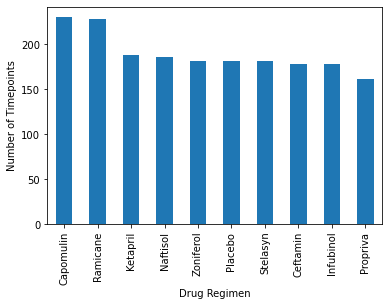

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_per_regimen = mousestudy_data_complete.groupby("Drug Regimen")["Timepoint"].count()
timepoints_per_regimen = timepoints_per_regimen.sort_values(ascending=False)

#timepoints_per_regimen = timepoints_per_regimen.to_frame()
ax = timepoints_per_regimen.plot.bar(legend=False)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Number of Timepoints")


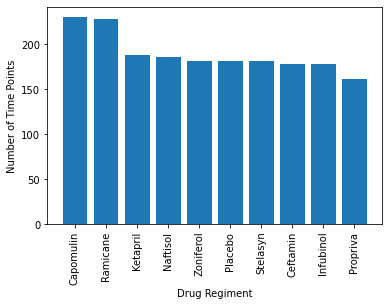

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints_per_regimen = mousestudy_data_complete.groupby("Drug Regimen")["Timepoint"].count()
timepoints_per_regimen = timepoints_per_regimen.sort_values(ascending=False)
plt.bar(timepoints_per_regimen.index, timepoints_per_regimen.values, width=0.8)
plt.xticks(rotation=90)
plt.xlabel("Drug Regiment")
plt.ylabel("Number of Time Points")
plt.show()


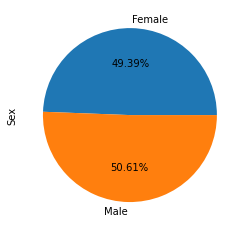

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_vs_male = mousestudy_data_complete.groupby("Sex")["Sex"].count()
ax = female_vs_male.plot.pie(autopct='%1.2f%%')


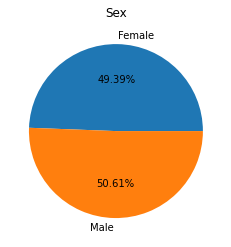

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female_vs_male = mousestudy_data_complete.groupby("Sex")["Sex"].count()
plt.pie(female_vs_male, autopct='%1.2f%%', labels=["Female", "Male"])
plt.title("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = mousestudy_data_complete.loc[mousestudy_data_complete["Drug Regimen"] == "Capomulin",:]
Ramicane_df = mousestudy_data_complete.loc[mousestudy_data_complete["Drug Regimen"] == "Ramicane", :]
Infubinol_df = mousestudy_data_complete.loc[mousestudy_data_complete["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = mousestudy_data_complete.loc[mousestudy_data_complete["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, mousestudy_data_complete, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
Treatment_List = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Empty_List = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes.
# add subset.
# Determine outliers using upper and lower bounds.

for drug in Treatment_List:
    drug_df = mousestudy_data_complete.loc[mousestudy_data_complete["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    Empty_List.append(drug_df)
    quartiles = drug_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"Lower Quartile of {drug}: {lowerq}")
    print(f"Upper Quartile of {drug}: {upperq}")
    print(f"Interquartile Range of {drug}: {iqr}")
    print(f"Median of {drug}: {quartiles[0.5]} ")

Lower Quartile of Capomulin: 37.685932865
Upper Quartile of Capomulin: 45.0
Interquartile Range of Capomulin: 7.314067135000002
Median of Capomulin: 41.557808879999996 
Lower Quartile of Ramicane: 36.674634585
Upper Quartile of Ramicane: 45.0
Interquartile Range of Ramicane: 8.325365415
Median of Ramicane: 40.67323554 
Lower Quartile of Infubinol: 47.3123533
Upper Quartile of Infubinol: 57.314443967500004
Interquartile Range of Infubinol: 10.002090667500006
Median of Infubinol: 51.82058438 
Lower Quartile of Ceftamin: 47.2084271125
Upper Quartile of Ceftamin: 56.801437570000004
Interquartile Range of Ceftamin: 9.593010457500007
Median of Ceftamin: 51.77615728 


C:\Users\mjndo\anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


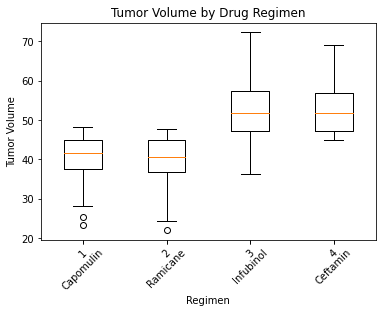

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig = plt.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], Treatment_List, rotation=45)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(Empty_List)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

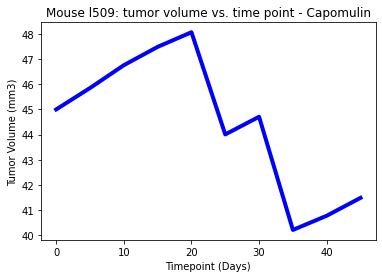

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
plt.title('Mouse l509: tumor volume vs. time point - Capomulin')
plt.plot(x_axis, tumsiz,linewidth=4,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


Text(0, 0.5, 'Avg Tumor Volume (mm3)')

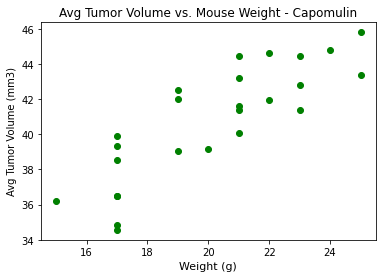

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()
marker_size=20
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="green")
plt.title('Avg Tumor Volume vs. Mouse Weight - Capomulin')
plt.xlabel('Weight (g)',fontsize =11)
plt.ylabel('Avg Tumor Volume (mm3)')


## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"Correlation mouse weight and average tumor volume: {round(correlation[0],2)}")


Correlation mouse weight and  average tumor volume: 0.84


The r-squared is: 0.709


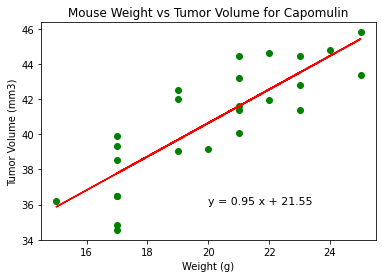

In [31]:
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='g')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=11)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()